# DI725 Assignment 1 - Exploratory Data Analysis

Ali Yiğit Başaran - 2231355

In [1]:
!git clone https://github.com/caglarmert/DI725.git

Cloning into 'DI725'...
on a case-insensitive filesystem) and only one from the same
colliding group is in the working tree:

  'src/Positional_Encoding.png'
  'src/positional_encoding.PNG'


In [1]:
%cd DI725/assignment_1

c:\Users\Ali\Desktop\DI725_Asg1_Repo\DI725\assignment_1


C:\Users\Ali\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder


In [5]:
!cd

c:\Users\Ali\Desktop\DI725_Asg1_Repo\DI725\assignment_1


In [6]:
train_path = "./data/customer_service/train.csv" 
test_path =  "./data/customer_service/test.csv" 

# Load the datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [7]:

# Basic info and preview
train_overview = {
    "shape": train_df.shape,
    "columns": train_df.columns.tolist(),
    "null_counts": train_df.isnull().sum(),
    "sample_rows": train_df.sample(5, random_state=1)
}

test_overview = {
    "shape": test_df.shape,
    "columns": test_df.columns.tolist(),
    "null_counts": test_df.isnull().sum(),
    "sample_rows": test_df.sample(5, random_state=1)
}

train_overview
test_overview


{'shape': (30, 11),
 'columns': ['issue_area',
  'issue_category',
  'issue_sub_category',
  'issue_category_sub_category',
  'customer_sentiment',
  'product_category',
  'product_sub_category',
  'issue_complexity',
  'agent_experience_level',
  'agent_experience_level_desc',
  'conversation'],
 'null_counts': issue_area                     0
 issue_category                 0
 issue_sub_category             0
 issue_category_sub_category    0
 customer_sentiment             0
 product_category               0
 product_sub_category           0
 issue_complexity               0
 agent_experience_level         0
 agent_experience_level_desc    0
 conversation                   0
 dtype: int64,
 'sample_rows':                    issue_area                   issue_category  \
 17                   Warranty    Lost or Missing Warranty Card   
 21                      Order    Order Confirmation and Status   
 10                   Shopping  Product Availability and Status   
 19            

In [8]:

# Total number of data
train_total = train_df.shape[0]
test_total = test_df.shape[0]

# Count of sentiment labels
train_sentiment_counts = train_df['customer_sentiment'].value_counts()
test_sentiment_counts = test_df['customer_sentiment'].value_counts()

(train_total, test_total, train_sentiment_counts, test_sentiment_counts)


(970,
 30,
 customer_sentiment
 neutral     542
 negative    411
 positive     17
 Name: count, dtype: int64,
 customer_sentiment
 negative    10
 neutral     10
 positive    10
 Name: count, dtype: int64)

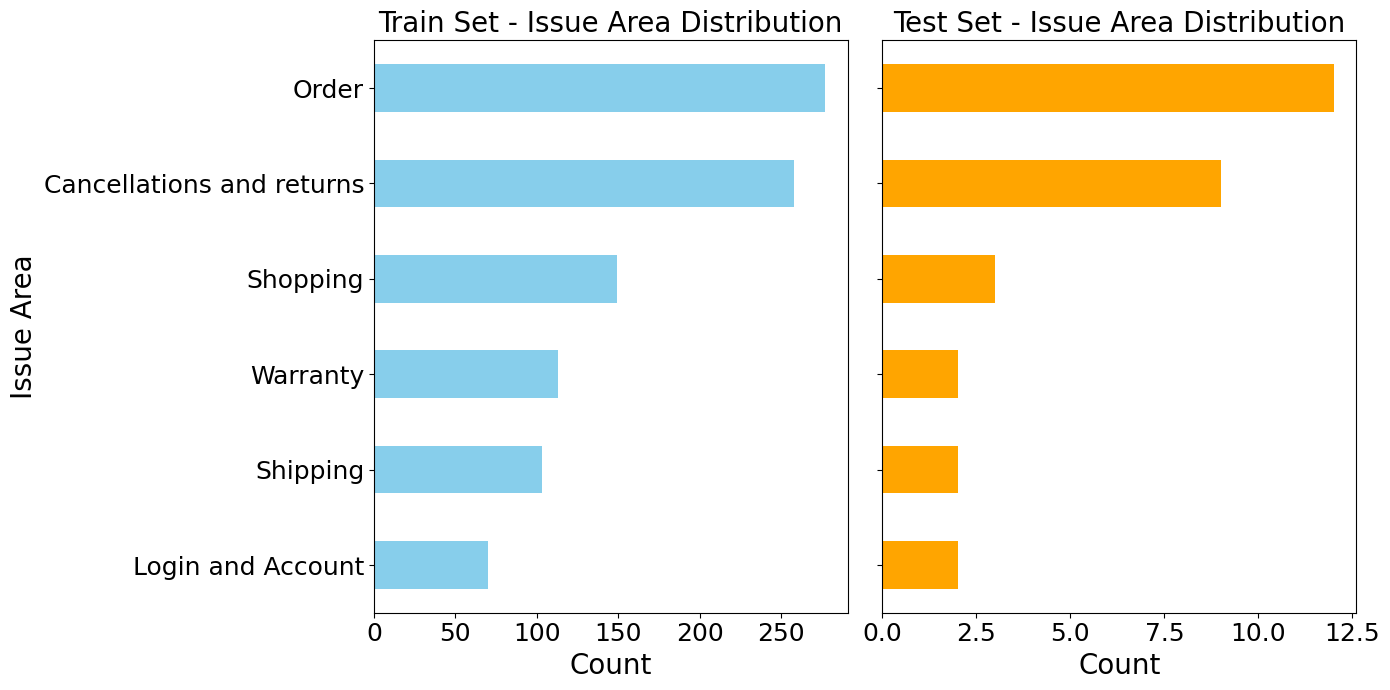

In [9]:
# Plot side-by-side (not in same axis) using subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Common font size
label_fontsize = 20
title_fontsize = 20
tick_fontsize = 18

# Train Set Plot
train_df['issue_area'].value_counts().sort_values().plot(
    kind='barh', ax=axs[0], color='skyblue'
)
axs[0].set_title('Train Set - Issue Area Distribution', fontsize=title_fontsize)
axs[0].set_xlabel('Count', fontsize=label_fontsize)
axs[0].set_ylabel('Issue Area', fontsize=label_fontsize)
axs[0].tick_params(axis='both', labelsize=tick_fontsize)

# Test Set Plot
test_df['issue_area'].value_counts().sort_values().plot(
    kind='barh', ax=axs[1], color='orange'
)
axs[1].set_title('Test Set - Issue Area Distribution', fontsize=title_fontsize)
axs[1].set_xlabel('Count', fontsize=label_fontsize)
axs[1].set_ylabel('', fontsize=label_fontsize)
axs[1].tick_params(axis='both', labelsize=tick_fontsize)

plt.tight_layout()
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_19180\3598941389.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_counts.index, y=train_counts.values,
C:\Users\Ali\AppData\Local\Temp\ipykernel_19180\3598941389.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_counts.index, y=test_counts.values,


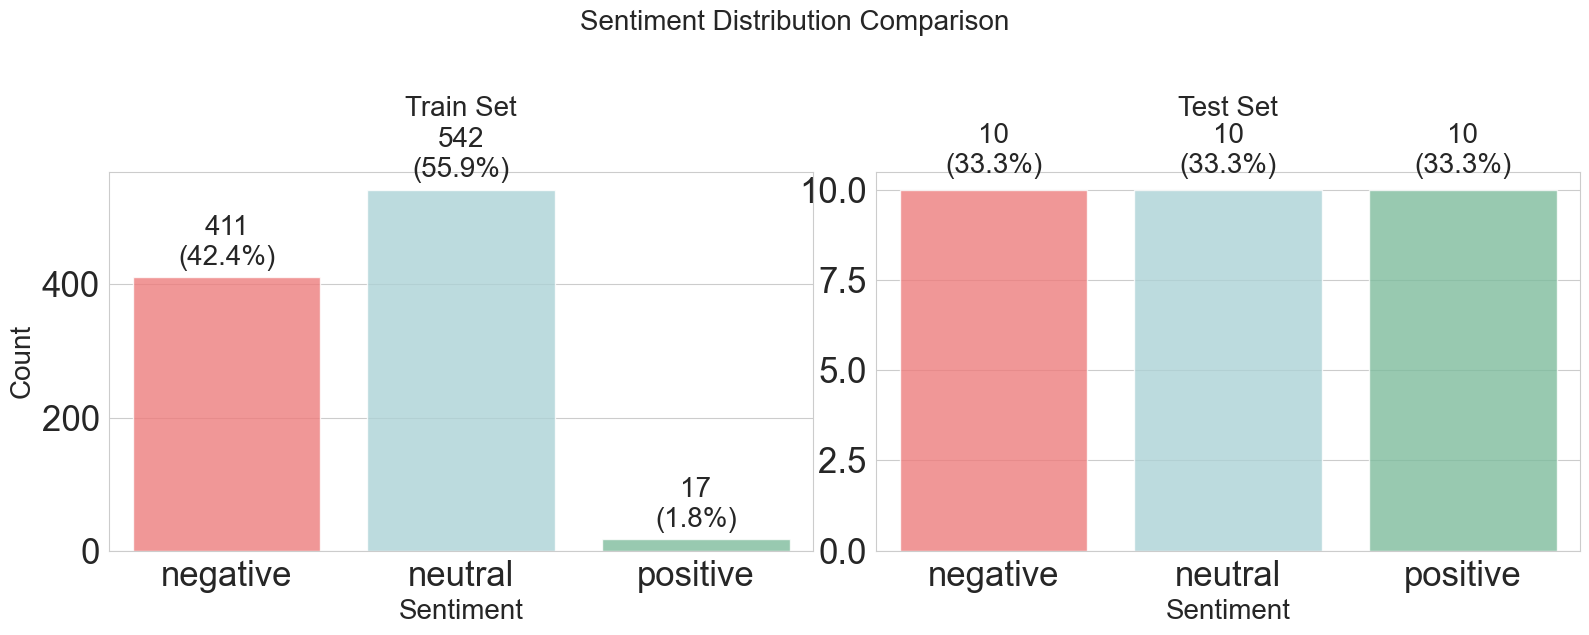

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and font sizes
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

# Define colors
palette = {'negative': '#ff6b6b', 'neutral': '#a5d8dd', 'positive': '#74c69d'}
sentiment_order = ['negative', 'neutral', 'positive']

# 1. Sentiment Distribution Comparison with larger fonts
def plot_sentiment_distribution(train_df, test_df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Sentiment Distribution Comparison', y=1.05, fontsize=20)
    
    # Train set
    train_counts = train_df['customer_sentiment'].value_counts().loc[sentiment_order]
    sns.barplot(x=train_counts.index, y=train_counts.values, 
                palette=palette, ax=ax1, alpha=0.8)
    ax1.set_title('Train Set', pad=40, fontsize=20)
    ax1.set_ylabel('Count', fontsize=20)
    ax1.set_xlabel('Sentiment', fontsize=20)
    
    # Add percentages
    total_train = len(train_df)
    for i, p in enumerate(ax1.patches):
        height = p.get_height()
        ax1.text(p.get_x() + p.get_width()/2., height + 0.01*total_train,
                f'{int(height)}\n({height/total_train:.1%})', 
                ha='center', va='bottom', fontsize=20)
    
    # Test set
    test_counts = test_df['customer_sentiment'].value_counts().loc[sentiment_order]
    sns.barplot(x=test_counts.index, y=test_counts.values, 
                palette=palette, ax=ax2, alpha=0.8)
    ax2.set_title('Test Set', pad=40, fontsize=20)
    ax2.set_xlabel('Sentiment', fontsize=20)
    
    # Add percentages
    total_test = len(test_df)
    for i, p in enumerate(ax2.patches):
        height = p.get_height()
        ax2.text(p.get_x() + p.get_width()/2., height + 0.01*total_test,
                f'{int(height)}\n({height/total_test:.1%})', 
                ha='center', va='bottom', fontsize=20)
    
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_sentiment_distribution(train_df, test_df)


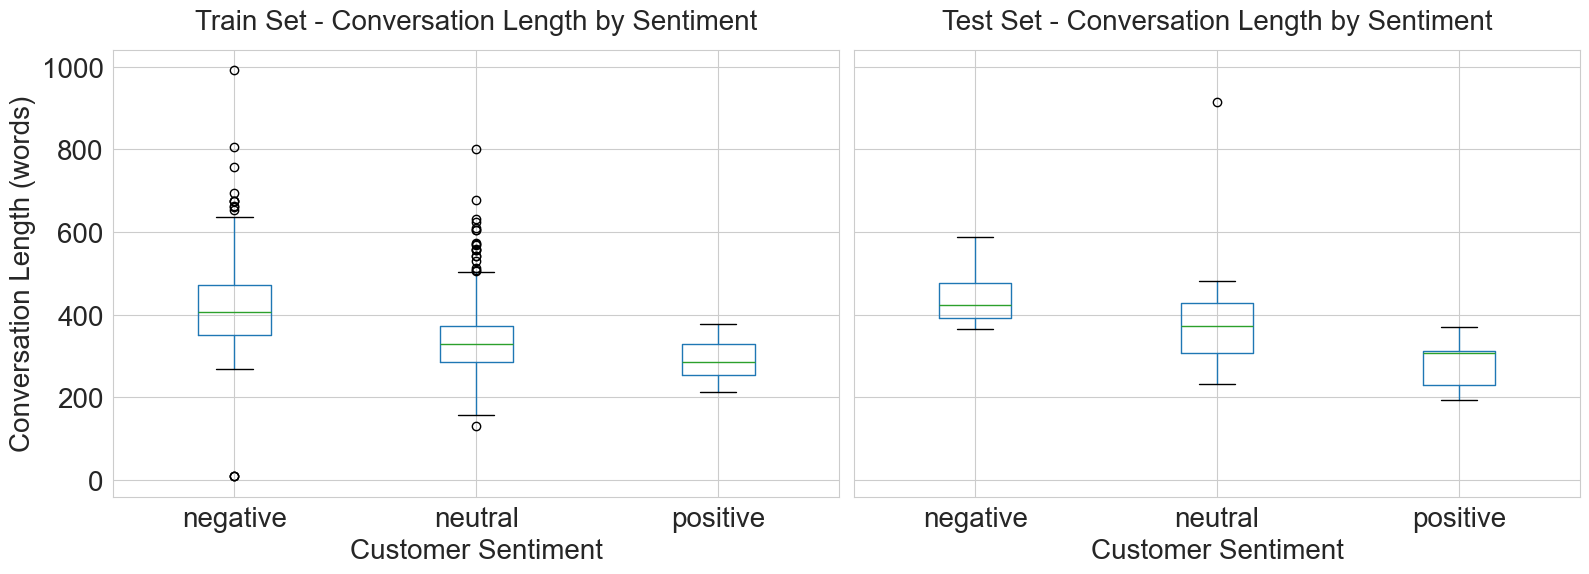

In [11]:

# Calculate conversation length (word count)
train_df['conversation_length'] = train_df['conversation'].apply(lambda x: len(x.split()))
test_df['conversation_length'] = test_df['conversation'].apply(lambda x: len(x.split()))

# Set font sizes for better visibility
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# Create boxplots side-by-side for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Boxplot for the train set
train_df.boxplot(column='conversation_length', by='customer_sentiment', ax=axes[0])
axes[0].set_title('Train Set - Conversation Length by Sentiment', pad=15, fontsize=20)
axes[0].set_xlabel('Customer Sentiment', fontsize=20)
axes[0].set_ylabel('Conversation Length (words)', fontsize=20)
axes[0].grid(True)

# Boxplot for the test set
test_df.boxplot(column='conversation_length', by='customer_sentiment', ax=axes[1])
axes[1].set_title('Test Set - Conversation Length by Sentiment', pad=15, fontsize=20)
axes[1].set_xlabel('Customer Sentiment', fontsize=20)
axes[1].grid(True)

# Remove the automatic matplotlib suptitle
plt.suptitle('')
plt.tight_layout()
plt.show()


C:\Users\Ali\AppData\Local\Temp\ipykernel_19180\1942369628.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df_plot, y='ngram', x='count', ax=axes[row, 0], palette=palette)
C:\Users\Ali\AppData\Local\Temp\ipykernel_19180\1942369628.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test_df_plot, y='ngram', x='count', ax=axes[row, 1], palette=palette)
C:\Users\Ali\AppData\Local\Temp\ipykernel_19180\1942369628.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df_plot, y='ngram', x='count', ax=axes[row, 0], p

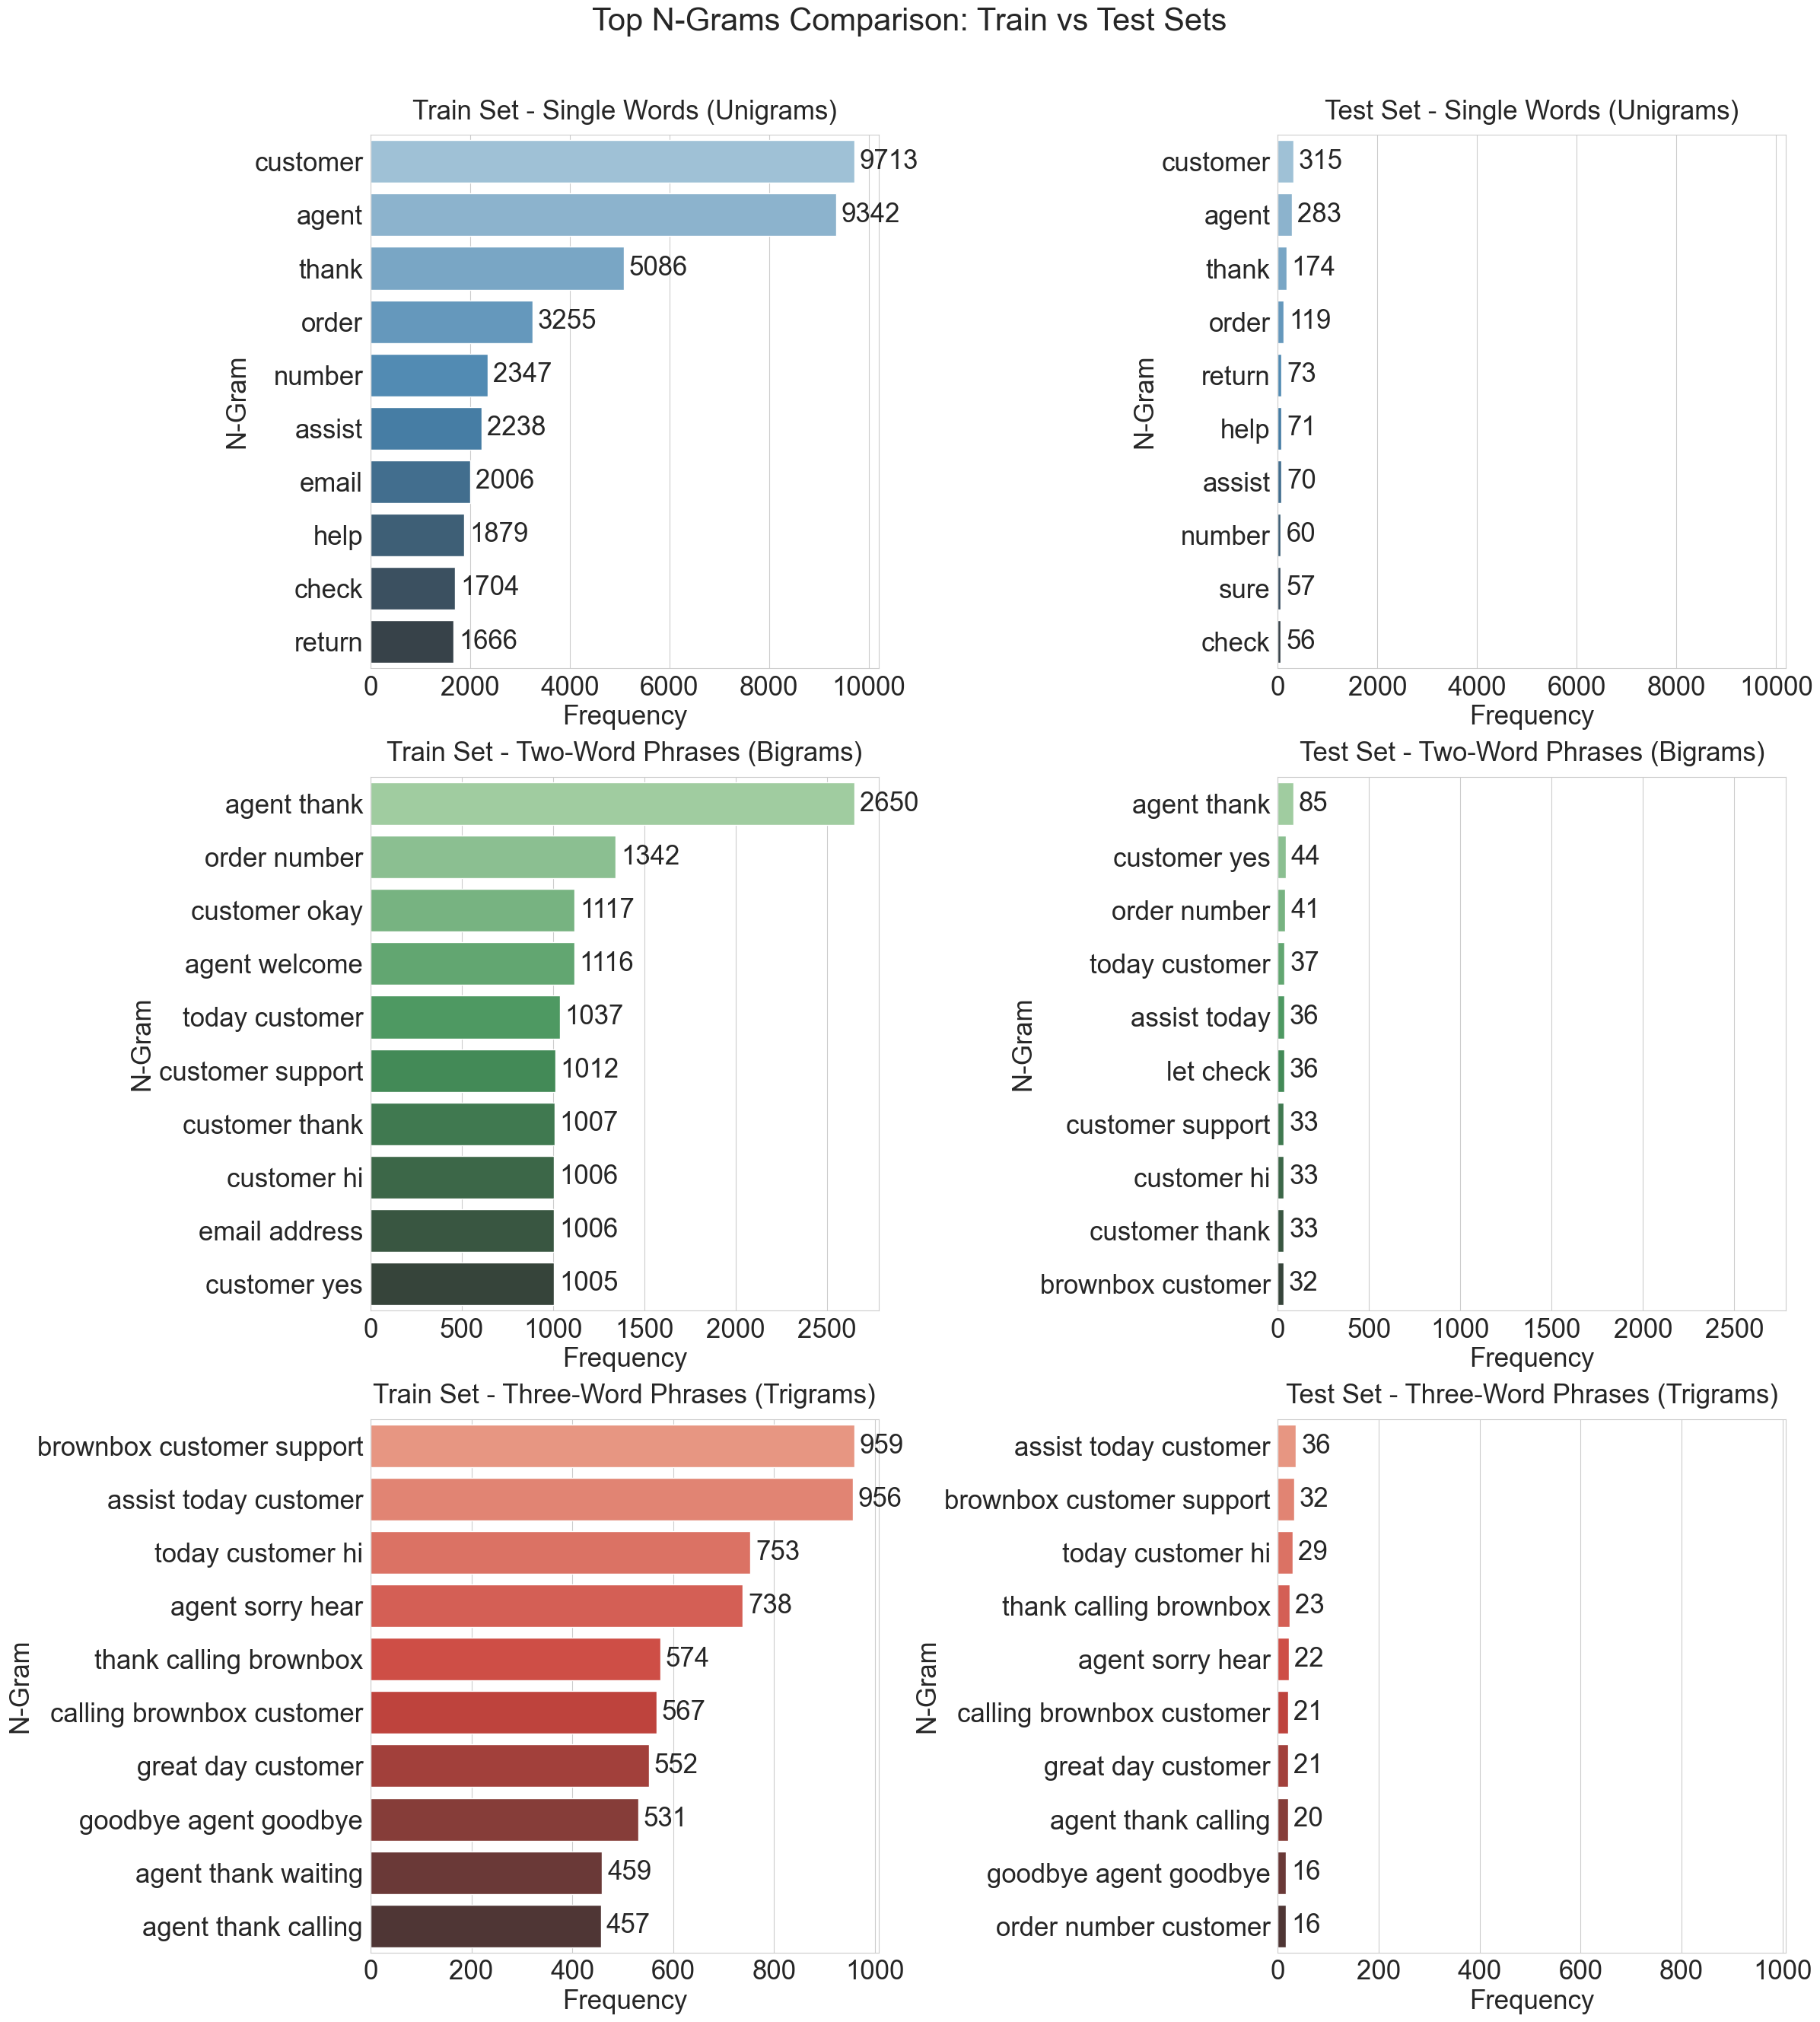

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Set global style and font sizes
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 24)
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

def get_top_ngrams(corpus, ngram_range=(1,1), n=10, stop_words='english'):
    """Get top n n-grams from a text corpus."""
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words, max_features=10000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

def plot_ngrams_comparison(train_df, test_df):
    train_text = train_df['conversation'].tolist()
    test_text = test_df['conversation'].tolist()
    
    fig, axes = plt.subplots(3, 2, figsize=(24, 26))
    fig.suptitle('Top N-Grams Comparison: Train vs Test Sets', y=1.02, fontsize=30)
    
    ngram_types = [
        ('Single Words (Unigrams)', (1,1), 'Blues_d'),
        ('Two-Word Phrases (Bigrams)', (2,2), 'Greens_d'),
        ('Three-Word Phrases (Trigrams)', (3,3), 'Reds_d')
    ]
    
    for row, (title, ngram_range, palette) in enumerate(ngram_types):
        train_ngrams = get_top_ngrams(train_text, ngram_range)
        test_ngrams = get_top_ngrams(test_text, ngram_range)
        
        train_df_plot = pd.DataFrame(train_ngrams, columns=['ngram', 'count'])
        test_df_plot = pd.DataFrame(test_ngrams, columns=['ngram', 'count'])
        
        sns.barplot(data=train_df_plot, y='ngram', x='count', ax=axes[row, 0], palette=palette)
        axes[row, 0].set_title(f'Train Set - {title}', pad=15, fontsize=25)
        axes[row, 0].set_xlabel('Frequency', fontsize=25)
        axes[row, 0].set_ylabel('N-Gram', fontsize=25)
        
        sns.barplot(data=test_df_plot, y='ngram', x='count', ax=axes[row, 1], palette=palette)
        axes[row, 1].set_title(f'Test Set - {title}', pad=15, fontsize=25)
        axes[row, 1].set_xlabel('Frequency', fontsize=25)
        axes[row, 1].set_ylabel('N-Gram', fontsize=25)
        
        for col in [0, 1]:
            for p in axes[row, col].patches:
                axes[row, col].annotate(f"{int(p.get_width())}",
                    (p.get_width(), p.get_y() + p.get_height() / 2),
                    xytext=(5, 0),
                    textcoords='offset points',
                    ha='left',
                    va='center',
                    fontsize=25)
        
        max_count = max(axes[row, 0].get_xlim()[1], axes[row, 1].get_xlim()[1])
        axes[row, 0].set_xlim(0, max_count)
        axes[row, 1].set_xlim(0, max_count)
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_ngrams_comparison(train_df, test_df)


Index(['issue_area', 'issue_category', 'issue_sub_category',
       'issue_category_sub_category', 'customer_sentiment', 'product_category',
       'product_sub_category', 'issue_complexity', 'agent_experience_level',
       'agent_experience_level_desc', 'conversation_length'],
      dtype='object')


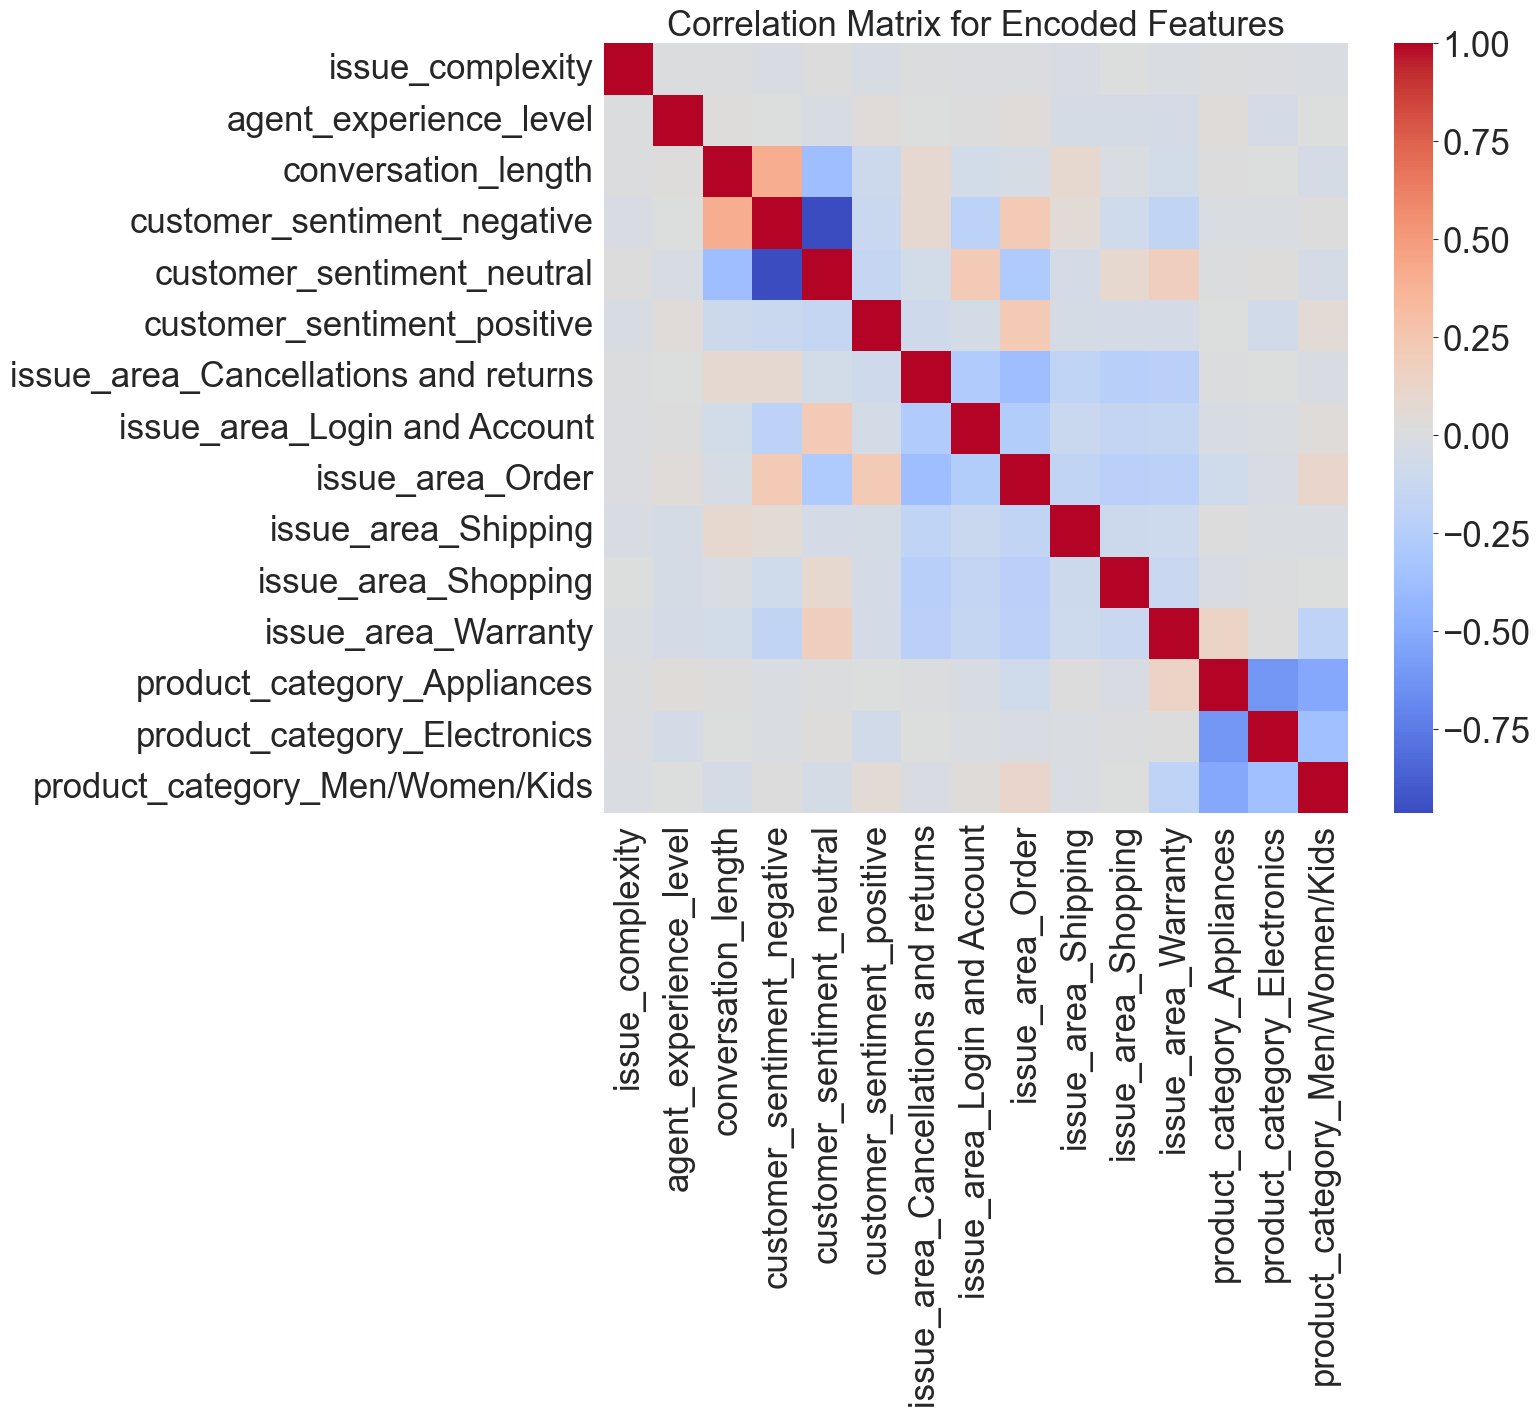

In [13]:
label_encode_columns = ['issue_complexity', 'agent_experience_level']
one_hot_encode_columns = ['customer_sentiment', 'issue_area', 'product_category']

label_encoder = LabelEncoder()
for column in label_encode_columns:
    train_df[column] = label_encoder.fit_transform(train_df[column])


train_df['conversation_length'] = train_df['conversation'].apply(lambda x: len(x.split()))
train_data = train_df.drop(["conversation"],axis=1)

encoded_data = pd.get_dummies(train_data[one_hot_encode_columns +label_encode_columns + ["conversation_length"] ], columns=one_hot_encode_columns)
print(train_data.columns)
correlation_matrix = encoded_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))  # Adjust the size to fit all your variables
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # set annot=True if you want to see the coefficients
plt.title('Correlation Matrix for Encoded Features')
plt.show()
